CPMSC 448 Homework 5

Problem 1

Name: Christopher Kurcz

PSU id: cjk6056

Loading data with scikit-learn, and importing other necessary libraries

In [126]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
# we don't like warnings
# you can comment the following 2 lines if you'd like to
import warnings
warnings.filterwarnings('ignore')
from Problem1 import *

from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

a) Create a new data set with two features by computing the ratio of raw features (x = (x1, x2) where x1 = (sepal length/sepal width) and x2 = (petal length/petal width)) and plot the data to observe the clusters in data by yourself (use class label to color the data points for better illustration of clusters).

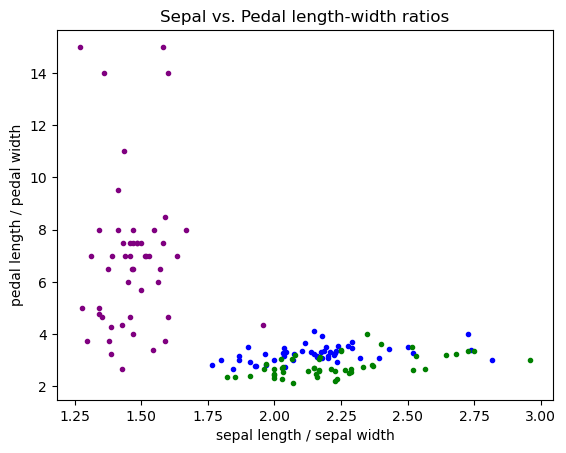

In [127]:
# initialize new data set
dataRatio = []

# fill data set with ratios of length to width
for i in range(X.shape[0]):
    ratios = []
    sepalRatio = X[i][0] / X[i][1]
    pedalRatio = X[i][2] / X[i][3]
    ratios.append(sepalRatio)
    ratios.append(pedalRatio)
    dataRatio.append(ratios)

dataRatio = np.array(dataRatio)

# plot the data set
for i in range(dataRatio.shape[0]):
    if y[i] == 0:
        plt.plot(dataRatio[i][0],dataRatio[i][1], marker=".", color = 'purple')
    if y[i] == 1:
        plt.plot(dataRatio[i][0],dataRatio[i][1], marker=".", color = 'blue')
    if y[i] == 2:
        plt.plot(dataRatio[i][0],dataRatio[i][1], marker=".", color = 'green')

plt.title('Sepal vs. Pedal length-width ratios')
plt.xlabel('sepal length / sepal width')
plt.ylabel('pedal length / pedal width')
plt.show()

c) Cluster the modified Iris dataset with with two features explained above. Run your algorithm 50 times over the data with different values of clusters k = 1, 2, . . . , 5 and plot the accuracies (horizontal and vertical axes should be the number of clusters and the clustering objective, respectively).

[947.45115327 268.71974905  85.58734112  57.04894401  43.66860037]


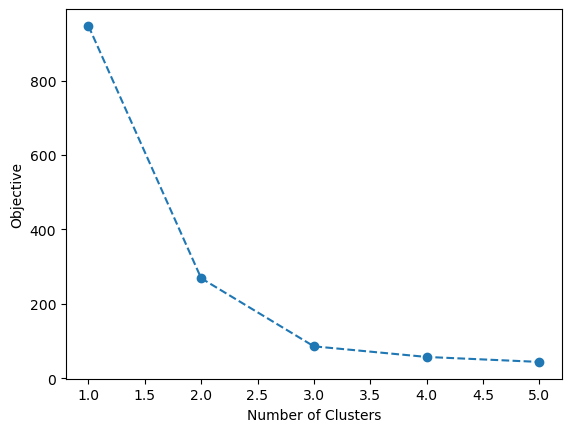

In [128]:
accuracies = []

for k in range(1,6):
    finalCentroids = k_means_pp(dataRatio, k, 5)
    accuracies.append(compute_objective(dataRatio, finalCentroids))

accuracies = np.array(accuracies)
print(accuracies)

plt.plot(range(1,6),accuracies, linestyle='--', marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Objective')
plt.show()

e) 1) Run the algorithm and create a plot showing how objective changes with number of iterations

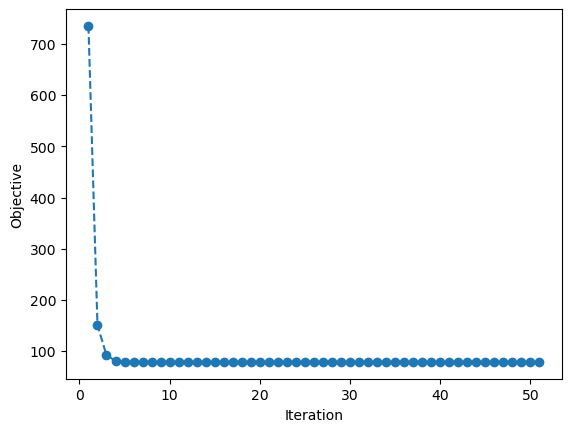

In [132]:
centers = k_init(X, 3)
objective = compute_objective(X, centers)
objectives = []
objectives.append(objective)

for i in range(50):
    dataMap = assign_data2clusters(X, centers)
    newCenters = update_centers(X, dataMap)
    newObjective = compute_objective(X, newCenters)
    objective = newObjective
    centers = newCenters
    objectives.append(objective)

plt.plot(range(1,len(objectives)+1),objectives, linestyle='--', marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective')
plt.show()


e) 2) Create a plot with the data colored by assignment, and the cluster centers.

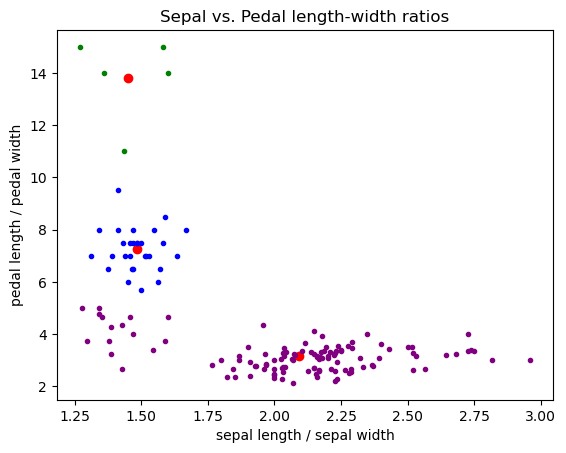

In [133]:
finalCentroids = k_means_pp(dataRatio, 3, 50)
dataMap = assign_data2clusters(dataRatio, finalCentroids)
for i in range(X.shape[0]):
    if dataMap[i][0] == 1:
        plt.plot(dataRatio[i][0],dataRatio[i][1], marker=".", color = 'purple')
    elif dataMap[i][1] == 1:
        plt.plot(dataRatio[i][0],dataRatio[i][1], marker=".", color = 'blue')
    elif dataMap[i][2] == 1:
        plt.plot(dataRatio[i][0],dataRatio[i][1], marker=".", color = 'green')

plt.scatter(finalCentroids[:, 0], finalCentroids[:, 1], color = 'red')
plt.title('Sepal vs. Pedal length-width ratios')
plt.xlabel('sepal length / sepal width')
plt.ylabel('pedal length / pedal width')
plt.show()